In [1]:
'''
Import Libraries

'''

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,KFold,GridSearchCV
from sklearn.preprocessing import StandardScaler,RobustScaler,LabelEncoder,Normalizer,Binarizer,MinMaxScaler,MaxAbsScaler,PolynomialFeatures
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix,classification_report,f1_score
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import RandomForestClassifier,GradientBoostingRegressor,StackingClassifier,VotingClassifier,GradientBoostingClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline, make_union,Pipeline
from sklearn.decomposition import PCA,KernelPCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter,defaultdict
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import scipy.stats as stats
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.preprocessing import minmax_scale
'''
This function is used to identify the outliers for Variable
'''

def identify_outliers(data, featureName):
    mean = np.mean(data[featureName])
    stddev = np.std(data[featureName])
    indices = []
    for index,value in data[featureName].iteritems():
        z_score = (value-mean)/stddev
        if abs(z_score) > 3:
            indices.append(index)
    return indices


'''
This function is used to generate the heat map for the data. 
This Function generate the Correlation Matrix between the Variables and then plots as Heat Map.
'''

def show_heat_map(data):
    correlation_matrix = data.corr()
    #To mask out the upper triangle
    plt.figure(figsize=(20,10))
    mask = np.zeros_like(correlation_matrix, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(data.corr(),mask=mask,annot=True)
    
    
    
def histogram_boxplot(feature, figsize=(10,5), bins = None):
    
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2,
                                           sharex = True, 
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) 
    
    sns.boxplot(x=feature, ax=ax_box2, showmeans=True, color='violet')
    sns.histplot(x=feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.histplot(feature, kde=False, ax=ax_hist2) 
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') 
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-')
    
    

    
def box_plt(feature, variable):
    plt.figure(figsize=(15,6)) 
    
    sns.boxplot(feature, x='Class',y=variable, data=data,palette='coolwarm',showmeans=True,
           meanprops={"marker":"^",
                    "markerfacecolor":"white",
                    "markeredgecolor":"black",
                    "markersize":"8"});


In [2]:
'''
Read Input File and Display the Shape
'''

data_file = 'Dry_Bean_Dataset.xlsx'
data = pd.read_excel(data_file,index_col='Bean ID')
data.shape

(13611, 17)

In [3]:
'''
Review the First Few records of the input data file read as Pandad Dateframe
'''
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
Bean ID,,,,,,,,,,,,,,,,,
1.0,28395.0,610.291,208.178117,173.888747,1.197191,0.549812,28715.0,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
2.0,28734.0,638.018,200.524796,182.734419,1.097356,0.411785,29172.0,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
3.0,29380.0,624.110,212.826130,175.931143,1.209713,0.562727,29690.0,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
4.0,30008.0,645.884,210.557999,182.516516,1.153638,0.498616,30724.0,195.467062,0.782681,0.976696,0.903936,NaN,0.007017,0.003215,0.861794,0.994199,SEKER
5.0,30140.0,620.134,201.847882,190.279279,1.060798,0.333680,30417.0,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [4]:
'''
Review the Data columns, Data type, and Columns information of input data file read as Pandad Dateframe
'''
data.info()


<class 'pandas.core.frame.DataFrame'>
Float64Index: 13611 entries, 1.0 to 13611.0
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  float64
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13609 non-null  float64
 3   MinorAxisLength  13608 non-null  float64
 4   AspectRation     13610 non-null  float64
 5   Eccentricity     13609 non-null  float64
 6   ConvexArea       13611 non-null  float64
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13608 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13607 non-null  float64
 12  ShapeFactor1     13607 non-null  float64
 13  ShapeFactor2     13609 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: flo

In [5]:
'''
Review the Data columns values and Statsistcs like Max, Min, Count, Std Deviation, etc. of input data file read as Pandad Dateframe
'''
data.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13609.000000,13608.000000,13610.000000,13609.000000,13611.000000,13611.000000,13611.000000,13608.000000,13611.000000,13607.000000,13607.000000,13609.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.155372,202.273996,1.583268,0.750930,53768.200206,253.064220,0.749733,0.987142,0.873282,0.799830,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.693199,44.974478,0.246669,0.091962,29774.915817,59.177120,0.049086,0.004661,0.059520,0.061691,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.319280,175.840519,1.432352,0.715953,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762444,0.005900,0.001153,0.581359,0.993703
50%,44652.000000,794.941000,296.899313,192.443880,1.551132,0.764446,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801227,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.497678,217.036082,1.707118,0.810471,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834234,0.007272,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information. The great difference in the scale of the numbers could cause problems when attempted to combine the values as features during modeling.

In [6]:
'''
MinMax normalize all numeric columns
'''
cols = data.select_dtypes(np.number).columns
data[cols] = minmax_scale(data[cols])


In [7]:
'''
Review the Data columns values and Statsistcs like Max, Min, Count, Std Deviation, etc. of input data file read as Pandad Dateframe
'''
data.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13609.000000,13608.000000,13610.000000,13609.000000,13611.000000,13611.000000,13611.000000,13608.000000,13611.000000,13607.000000,13607.000000,13609.000000,13611.000000,13611.000000
mean,0.139320,0.226304,0.245929,0.236200,0.397314,0.768232,0.136386,0.224978,0.625380,0.900104,0.765693,0.459306,0.493349,0.371390,0.413253,0.910285
std,0.125212,0.146710,0.154330,0.133184,0.175510,0.132803,0.122744,0.144996,0.157895,0.061787,0.118786,0.177924,0.147027,0.192128,0.175392,0.083898
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067926,0.122404,0.125560,0.157922,0.289934,0.717721,0.066084,0.131880,0.525344,0.880589,0.683497,0.351479,0.406812,0.190056,0.302997,0.884146
50%,0.103469,0.184992,0.204046,0.207090,0.374448,0.787751,0.100974,0.189141,0.657953,0.915225,0.785402,0.463335,0.503950,0.364208,0.410514,0.935698
75%,0.174691,0.309781,0.347399,0.279915,0.485436,0.854215,0.171533,0.289620,0.744779,0.938162,0.852681,0.558532,0.585642,0.517957,0.506118,0.964454
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:

'''
Check for Null Data Values

'''

print(data.isna().sum())

Area               0
Perimeter          0
MajorAxisLength    2
MinorAxisLength    3
AspectRation       1
Eccentricity       2
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           3
roundness          0
Compactness        4
ShapeFactor1       4
ShapeFactor2       2
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64


In [9]:
'''
Excluding ID and target
'''
data_columns = data.iloc[:, 0:-1].columns.array 
data_columns

<PandasArray>
[           'Area',       'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
    'AspectRation',    'Eccentricity',      'ConvexArea',   'EquivDiameter',
          'Extent',        'Solidity',       'roundness',     'Compactness',
    'ShapeFactor1',    'ShapeFactor2',    'ShapeFactor3',    'ShapeFactor4']
Length: 16, dtype: object

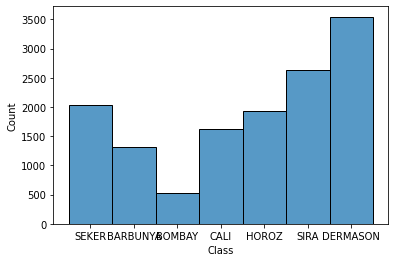

In [10]:
'''
Visualize the Count of Records per Class
'''
sns.histplot(data=data, x= 'Class')
plt.show()

In [11]:
data[data_columns].isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    2
MinorAxisLength    3
AspectRation       1
Eccentricity       2
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           3
roundness          0
Compactness        4
ShapeFactor1       4
ShapeFactor2       2
ShapeFactor3       0
ShapeFactor4       0
dtype: int64

We see Null Values, So we are replacing the Null values with Mode value

In [12]:
data['MajorAxisLength'].fillna(data['MajorAxisLength'].mode()[0],inplace=True)
data['MinorAxisLength'].fillna(data['MinorAxisLength'].mode()[0],inplace=True)
data['AspectRation'].fillna(data['AspectRation'].mode()[0],inplace=True)
data['Eccentricity'].fillna(data['Eccentricity'].mode()[0],inplace=True)
data['Solidity'].fillna(data['Solidity'].mode()[0],inplace=True)
data['Compactness'].fillna(data['Compactness'].mode()[0],inplace=True)
data['ShapeFactor1'].fillna(data['ShapeFactor1'].mode()[0],inplace=True)
data['ShapeFactor2'].fillna(data['ShapeFactor2'].mode()[0],inplace=True)

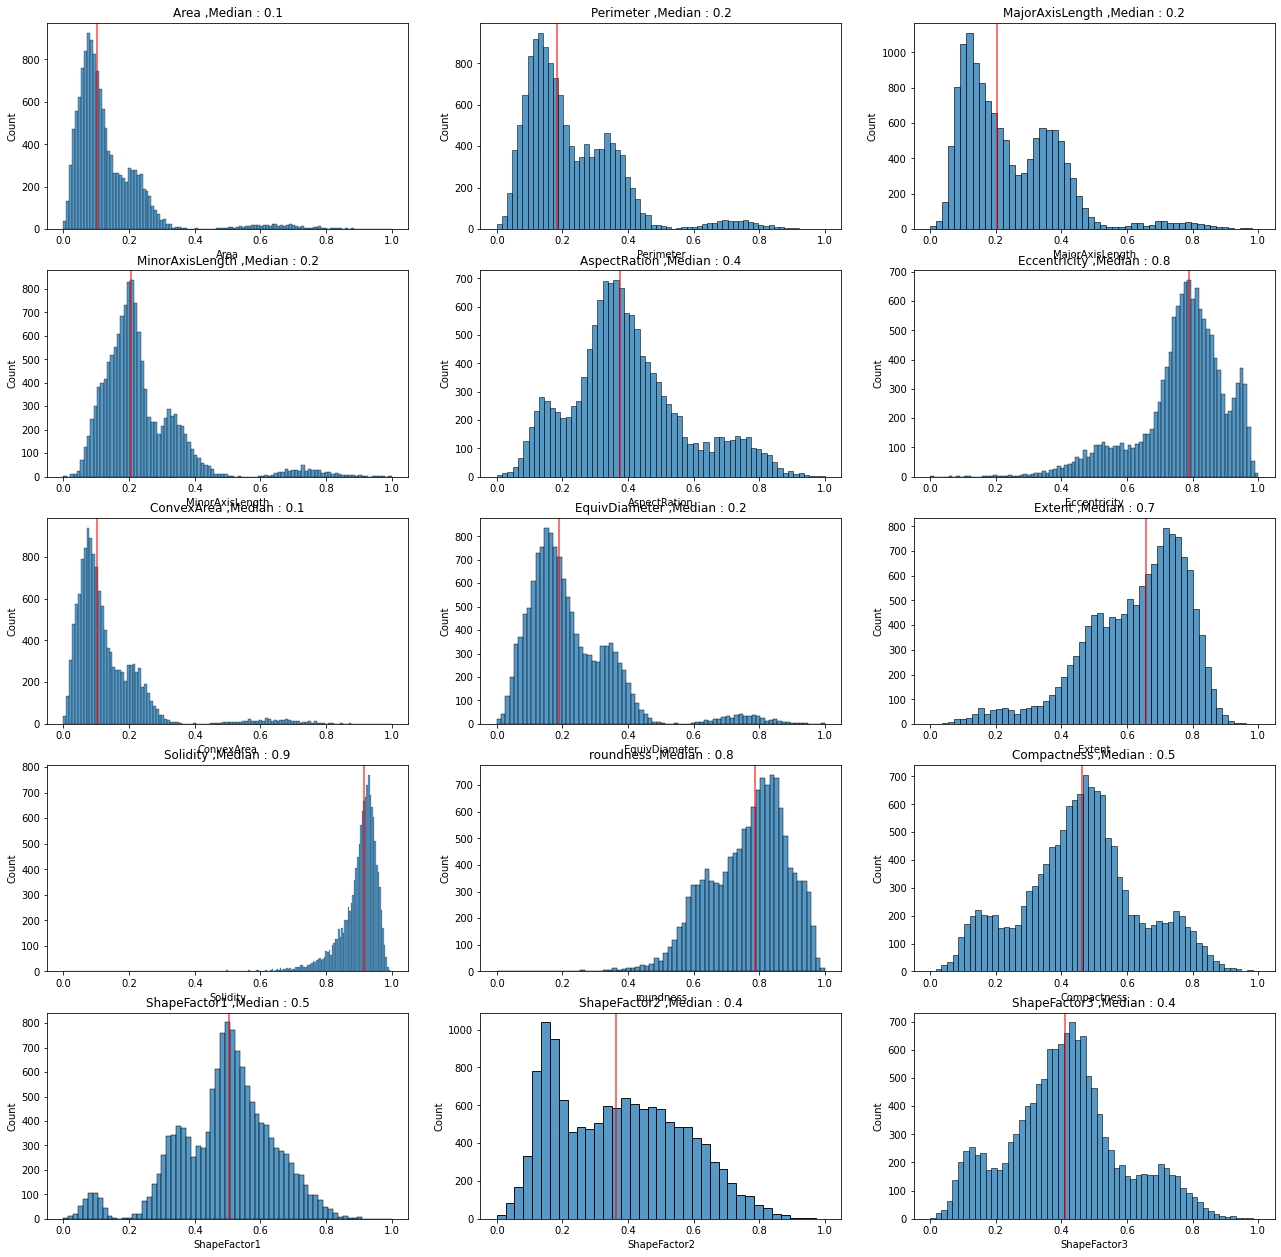

In [13]:
fig, axes = plt.subplots(5, 3, figsize=(22, 22))
for i, axe in enumerate(axes.flatten()):
    sns.histplot(data[data_columns[i]], ax = axe)
    median = data[data_columns[i]].median()
    axe.set_title(data_columns[i] + f' ,Median : {median:0.1f}')
    axe.axvline(median, color ='red', lw=2, alpha = 0.55)

array([[<AxesSubplot:title={'center':'Area'}>,
        <AxesSubplot:title={'center':'Perimeter'}>,
        <AxesSubplot:title={'center':'MajorAxisLength'}>,
        <AxesSubplot:title={'center':'MinorAxisLength'}>],
       [<AxesSubplot:title={'center':'AspectRation'}>,
        <AxesSubplot:title={'center':'Eccentricity'}>,
        <AxesSubplot:title={'center':'ConvexArea'}>,
        <AxesSubplot:title={'center':'EquivDiameter'}>],
       [<AxesSubplot:title={'center':'Extent'}>,
        <AxesSubplot:title={'center':'Solidity'}>,
        <AxesSubplot:title={'center':'roundness'}>,
        <AxesSubplot:title={'center':'Compactness'}>],
       [<AxesSubplot:title={'center':'ShapeFactor1'}>,
        <AxesSubplot:title={'center':'ShapeFactor2'}>,
        <AxesSubplot:title={'center':'ShapeFactor3'}>,
        <AxesSubplot:title={'center':'ShapeFactor4'}>]], dtype=object)

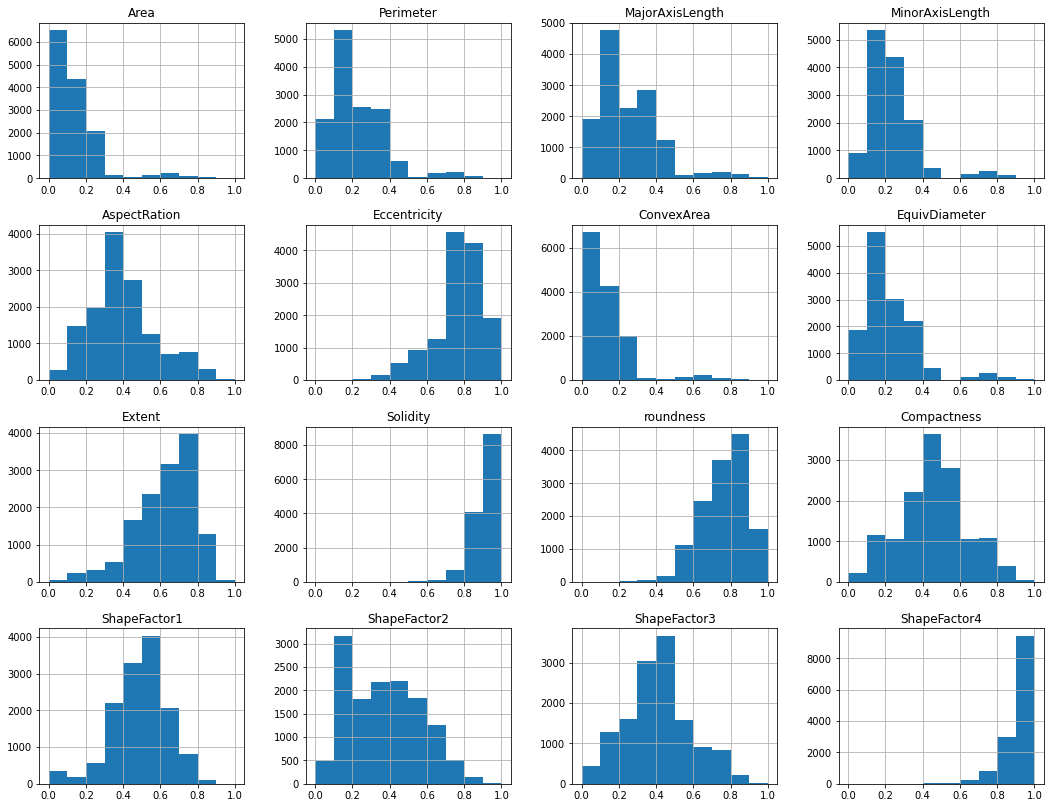

In [14]:
data.hist(figsize=(18,14))

<AxesSubplot:>

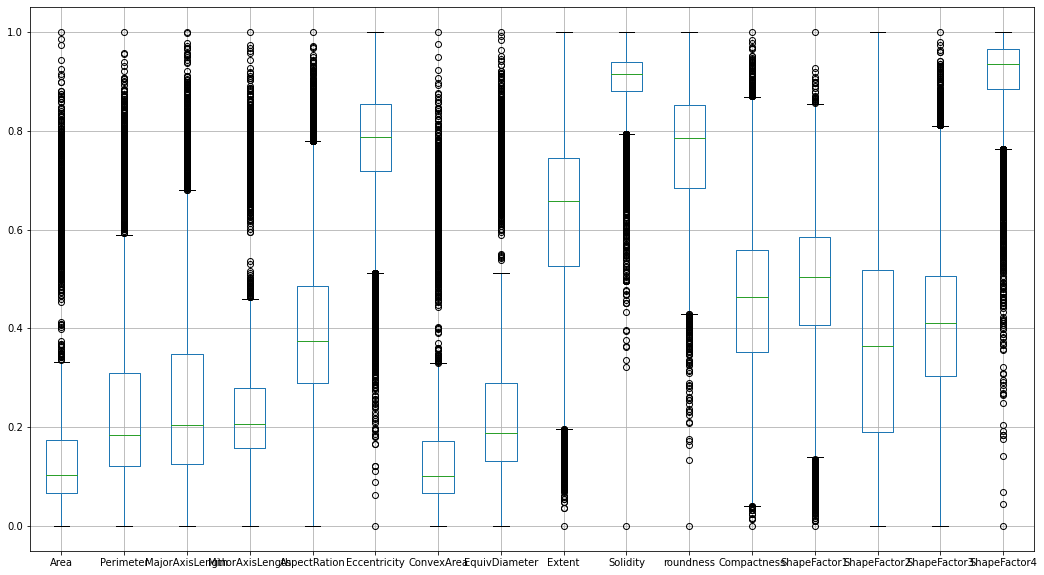

In [15]:
data.boxplot(figsize=(18,10))

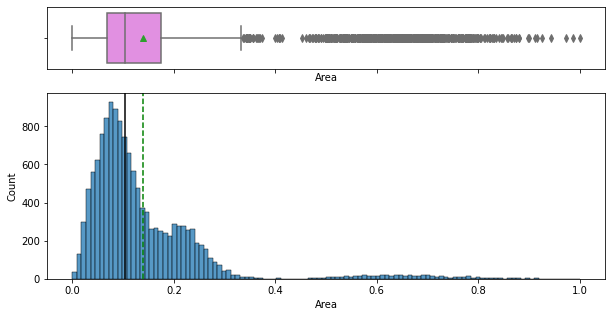

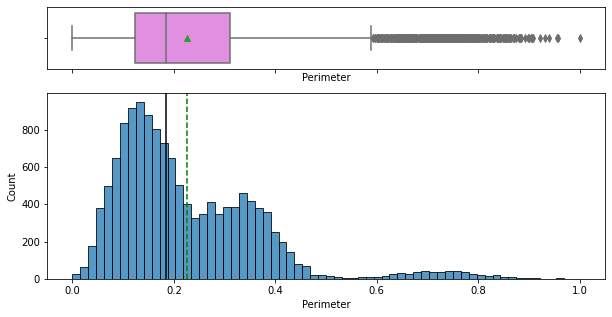

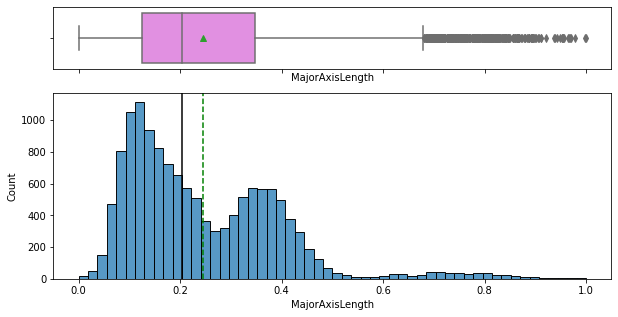

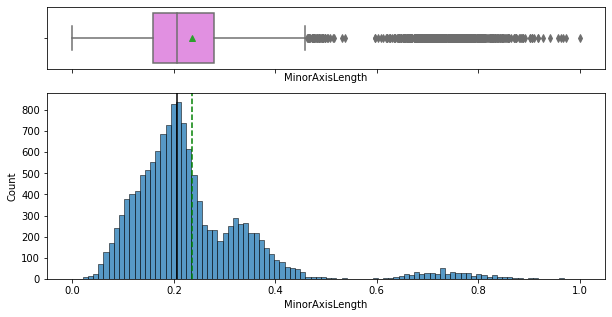

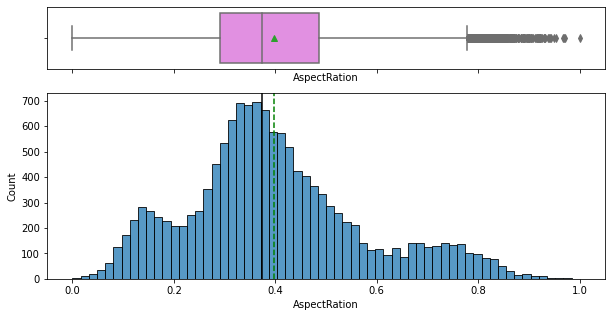

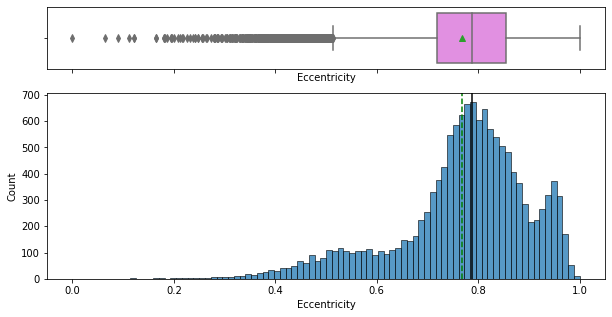

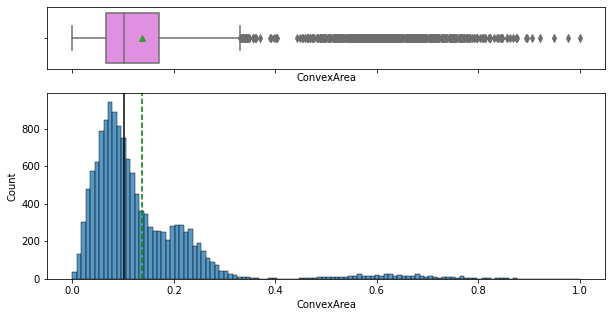

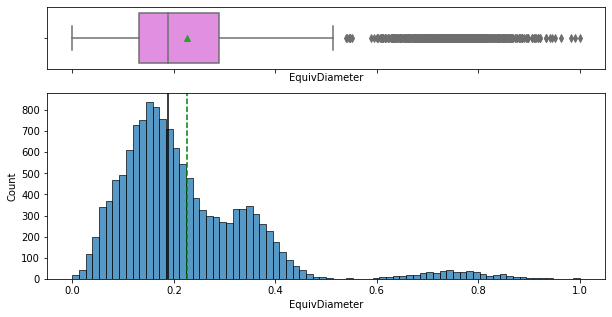

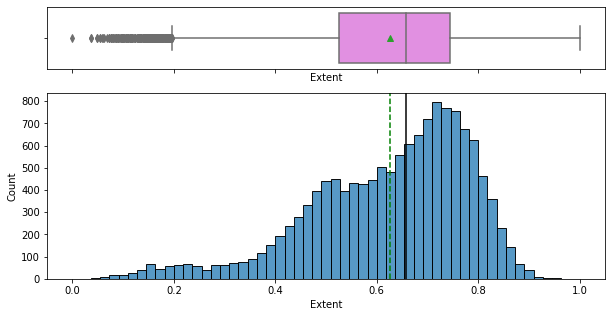

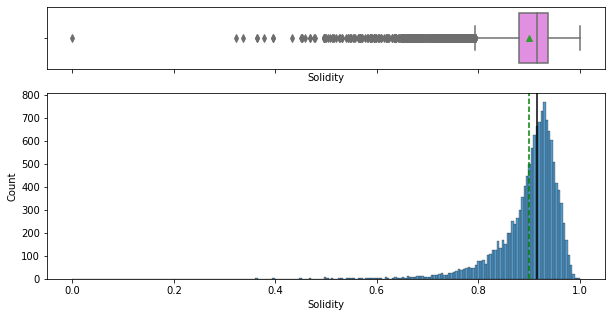

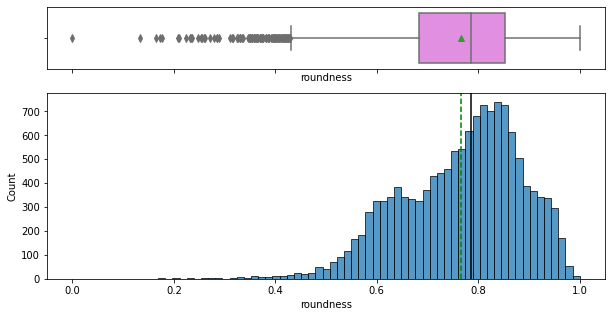

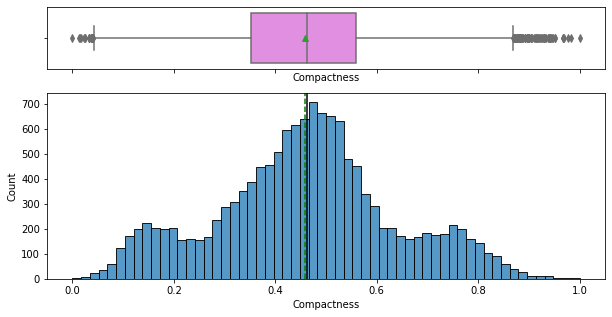

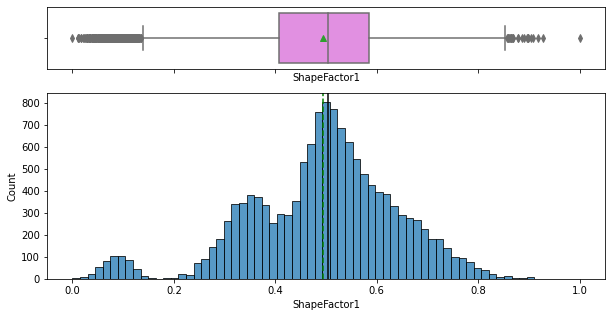

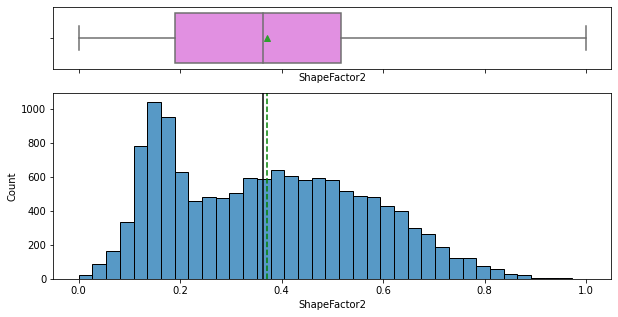

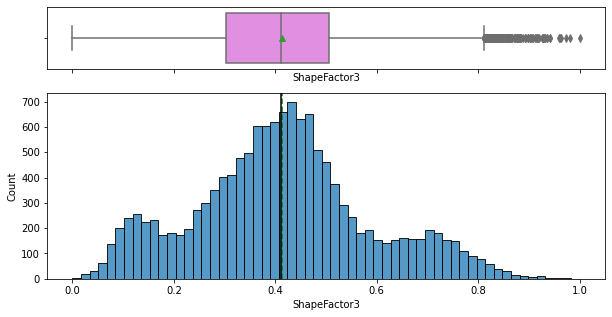

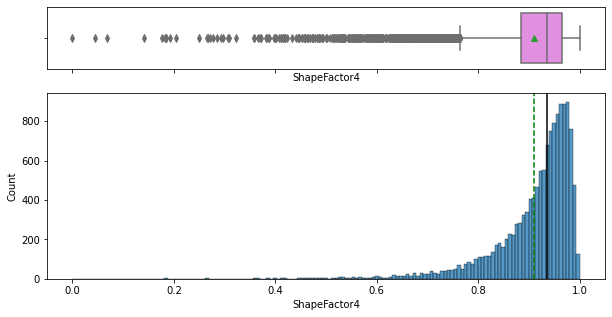

In [16]:
for col in data_columns:
    histogram_boxplot(data[col])

C:\Users\Bablu\Documents\TFCert\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Bablu\Documents\TFCert\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Bablu\Documents\TFCert\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.w

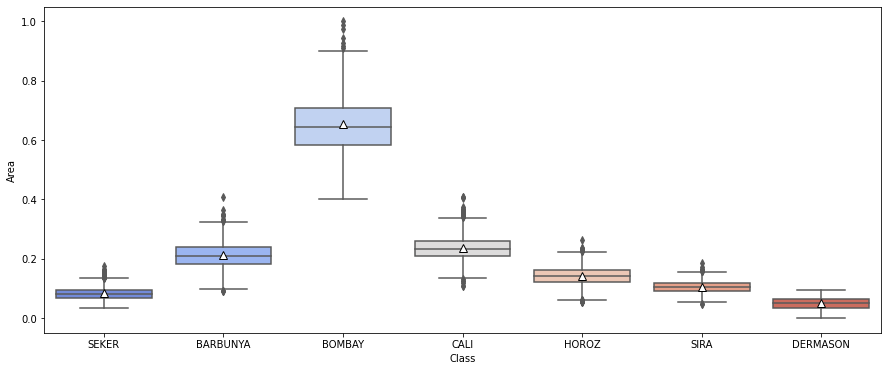

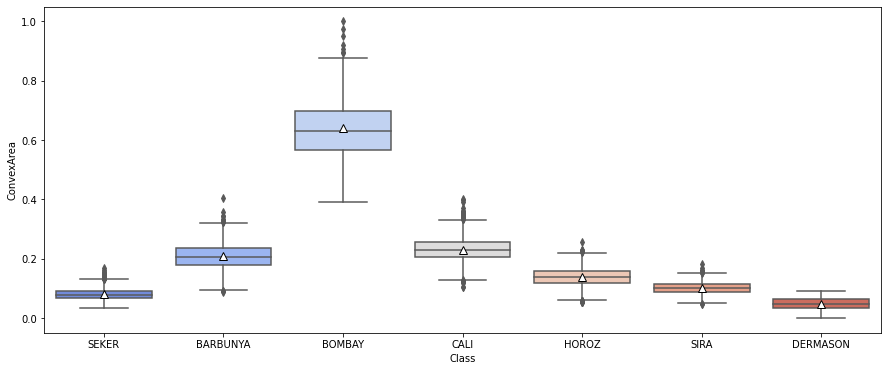

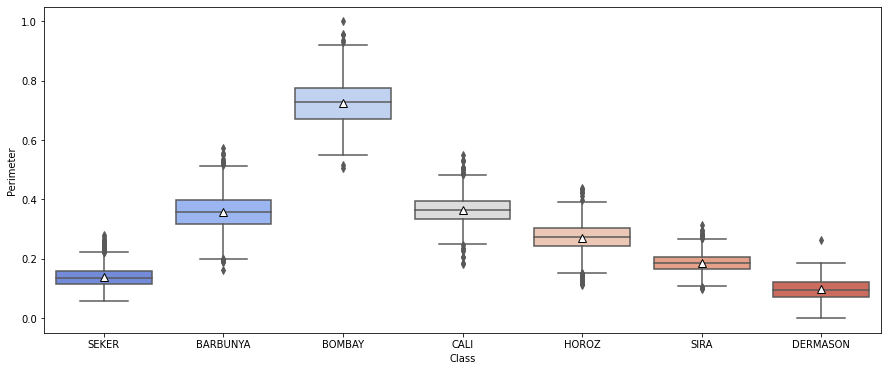

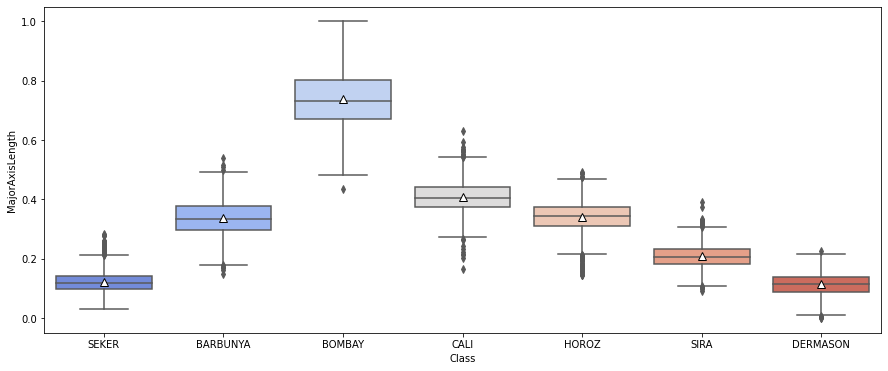

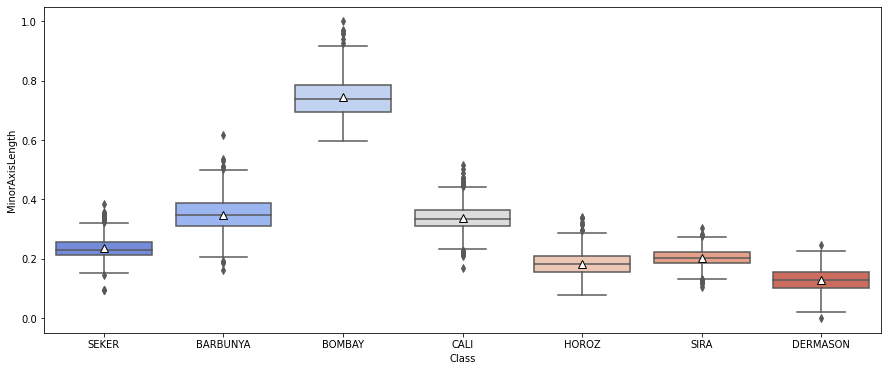

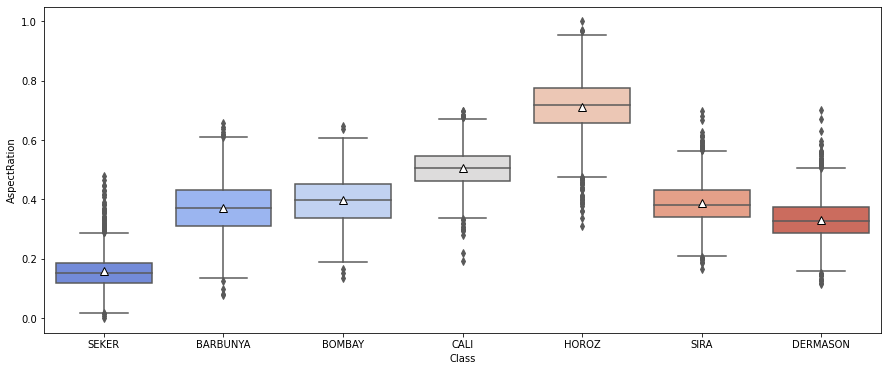

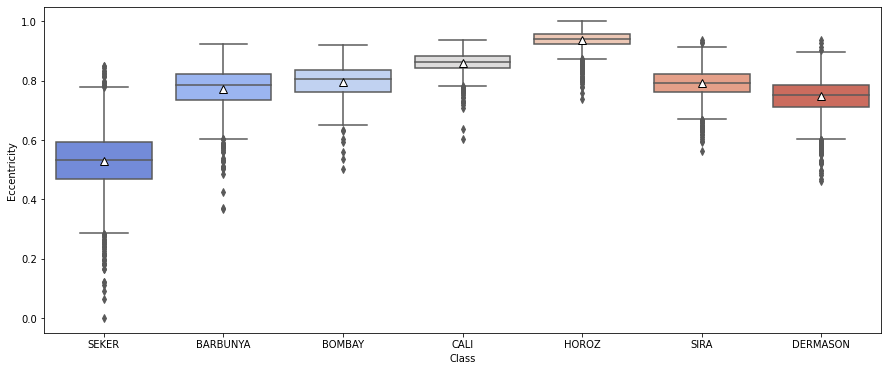

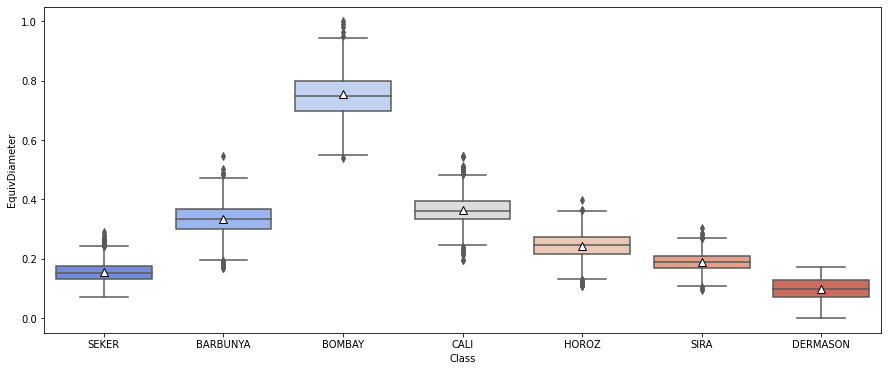

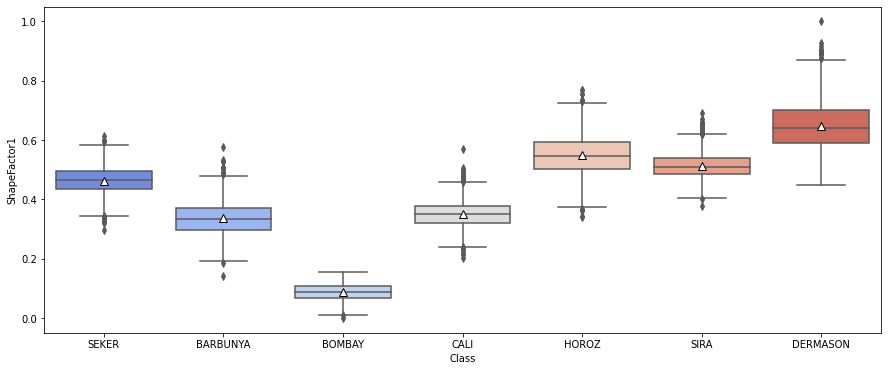

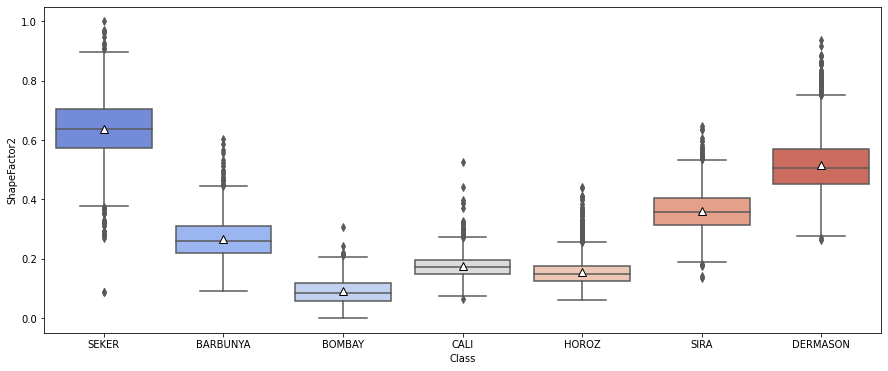

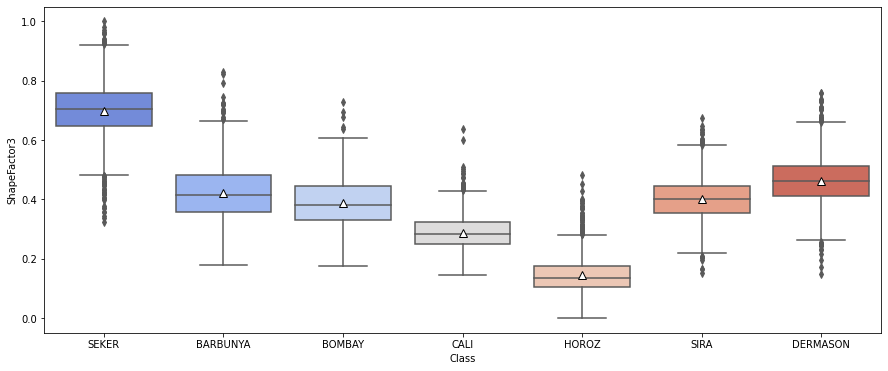

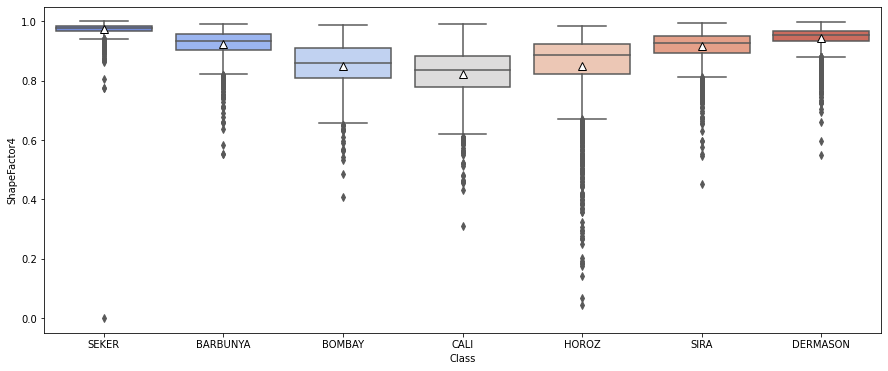

In [17]:
'''
Box Plot for Bi-Variate and Multi-Variate Data Analysis
'''

box_plt(data["Class"], data['Area'])
box_plt(data["Class"], data['ConvexArea'])
box_plt(data["Class"], data['Perimeter'])
box_plt(data["Class"], data['MajorAxisLength'])
box_plt(data["Class"], data['MinorAxisLength'])
box_plt(data["Class"], data['AspectRation'])
box_plt(data["Class"], data['Eccentricity'])
box_plt(data["Class"], data['EquivDiameter'])
box_plt(data["Class"], data['ShapeFactor1'])
box_plt(data["Class"], data['ShapeFactor2'])
box_plt(data["Class"], data['ShapeFactor3'])
box_plt(data["Class"], data['ShapeFactor4'])

C:\Users\Bablu\AppData\Local\Temp/ipykernel_3052/1297922780.py:65: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(correlation_matrix, dtype=np.bool)


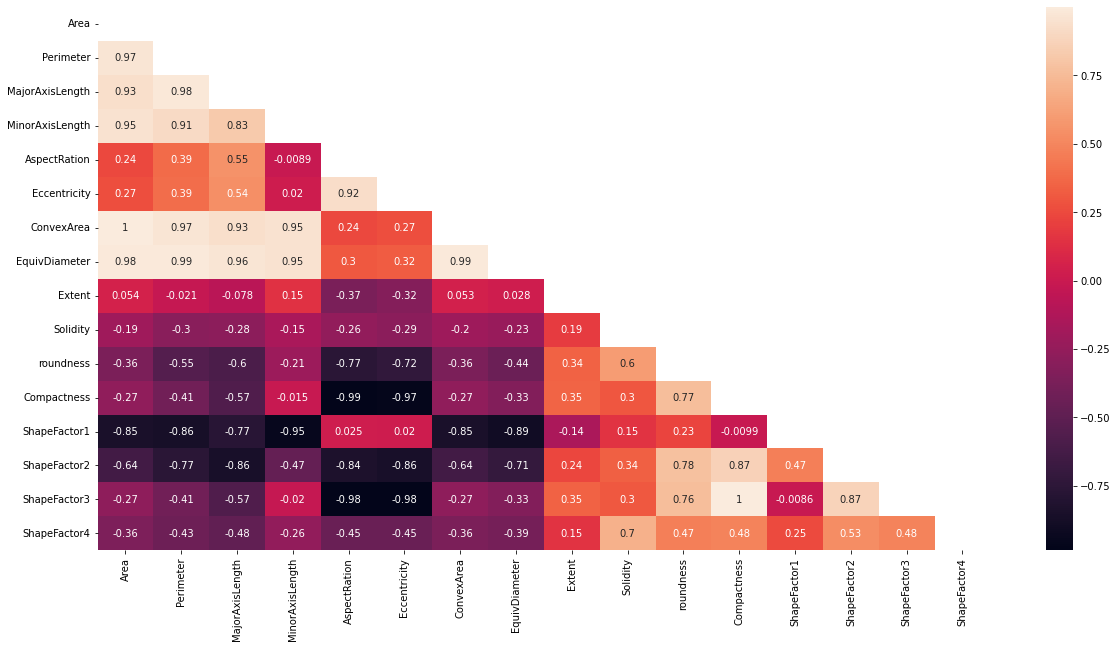

In [18]:
'''
Plot Heat map to identify positive correlation
'''
show_heat_map(data)

Area is right skewed bit lot of max outliers

Area has few extreme values

Perimeter is right-skewed 

Perimeter has lot of outliers 

Perimeter : : Few data points have significantly higher values

Major Axis Length is right-skewed data with max outliers

Major Axis Length : Few data points have significantly higher values

Minor Axis Length is right-skewed data with max outliers

Minor Axis Length : Few data points have significantly higher values

Eccentricity is left-skewed with minimum outliers

Eccentricity : Few data points have significantly lesser values

EquivDiameter is right-skewed data

Extent is left-skewed data

Compactness is normally distributed

Shapefactor 1 is normally distributed with min and max outliers

ShapeFactor 2 is normally distributed without any outliers

ShapeFactor 4 is extremely left skewed with minimum outliers

Comparing to ShapeFactor 3, 2, and 1 we can observe ShapeFactor 4 is extremely skewed

Most of the attributes are skewed

Some attributes having significantly higher or lower values

BOMBAY having higher Area, follwed by Cali and Barbunya. Least Area is for Dermason and Seker

Bombay having higher Perimeter, followed by Barbunya and Cali. Least Perimeter is for Dermason and Seker

Bombay having higher Major Axis Length followed by Calia and Barbunya, least Major Axis Length is for Dermason and Seker

Bombay having higher Minor Axis values, followed by Barbuya and Cali, least being Dermason

ShapeFactor 2 and 3 merely have the same trend

Some features have correlation = 1 with each other so we can safely drop one of them

	ConvexArea and Area
	ShapeFactor 3 and Compactness
    
Some feature have correlation almost equal to -1 (-0.99,-0.98) , we can also choose to drop one of them or take pca

	AscpectRatio and Compactness
	AscpectRatio and ShapeFactor 3
	MajorAxisLength and Perimeter
	Perimeter and Area
	EquivDiameter and Area
	EquivDiameter and Perimeter
	Eccentricity and ShapeFactor 3


Highly correlated features will not bring additional information (or just very few), but will increase the complexity of the algorithm, thus increasing the risk of errors.

In [19]:
'''
Dropping Coorelated Features/Attributes
'''


X = data.copy()
columns_to_drop  = ['Area','EquivDiameter','ShapeFactor3','Perimeter','AspectRation'
                   ,'MinorAxisLength','Compactness','MinorAxisLength']
X.drop(columns_to_drop,axis=1,inplace=True)


X.columns

Index(['MajorAxisLength', 'Eccentricity', 'ConvexArea', 'Extent', 'Solidity',
       'roundness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor4', 'Class'],
      dtype='object')

In [20]:
X.shape

(13611, 10)

<AxesSubplot:>

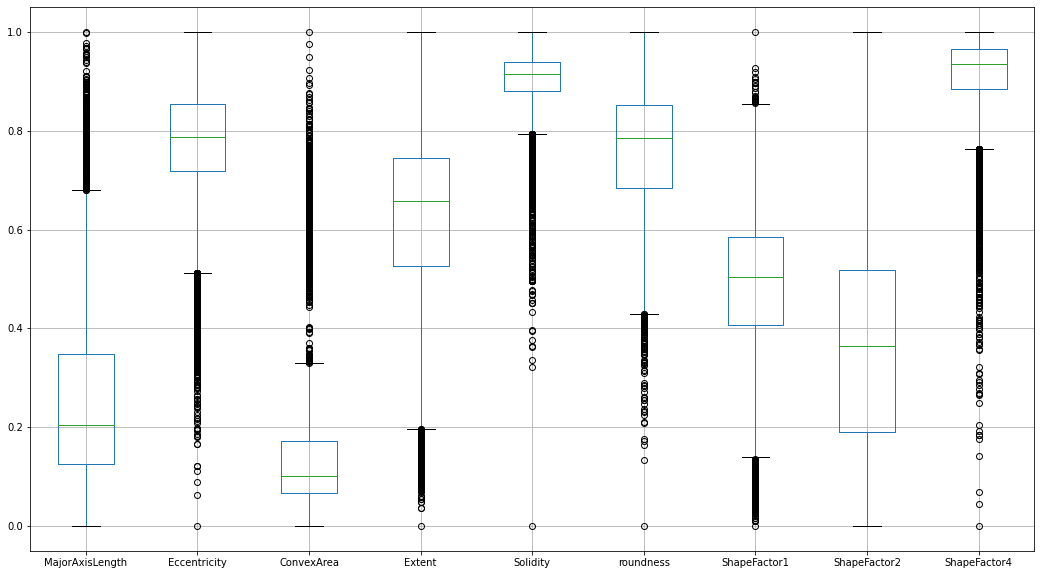

In [21]:
X.boxplot(figsize=(18,10))

We identify the outliers and drops the records as these outliers impacts the model performance. Outliers badly affect mean and standard deviation of the dataset. These may give erroneous results, increase the error variance and reduces the power of statistical tests.

In [22]:
'''
Identify the Outliers and Drop the Records
'''
ConvexArea_outliers=identify_outliers(X,'ConvexArea')
X.drop(ConvexArea_outliers,inplace=True)
print('Removed {} outliers from the dataset'.format(len(ConvexArea_outliers)))
X.shape

Removed 483 outliers from the dataset


(13128, 10)

<AxesSubplot:>

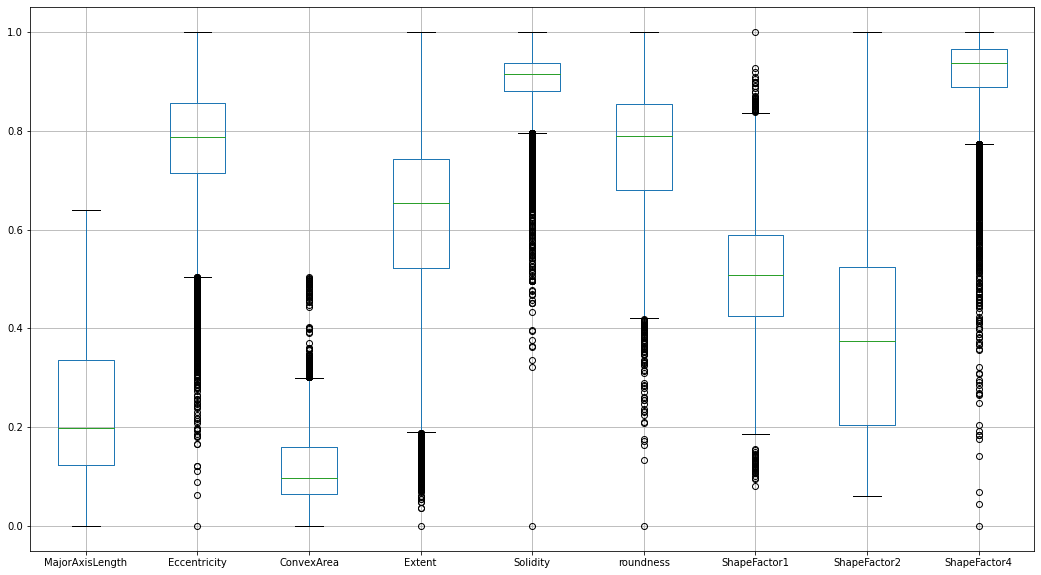

In [23]:
X.boxplot(figsize=(18,10))

In [24]:
X.iloc[:,:-1].columns.values.reshape(3,3)

array([['MajorAxisLength', 'Eccentricity', 'ConvexArea'],
       ['Extent', 'Solidity', 'roundness'],
       ['ShapeFactor1', 'ShapeFactor2', 'ShapeFactor4']], dtype=object)

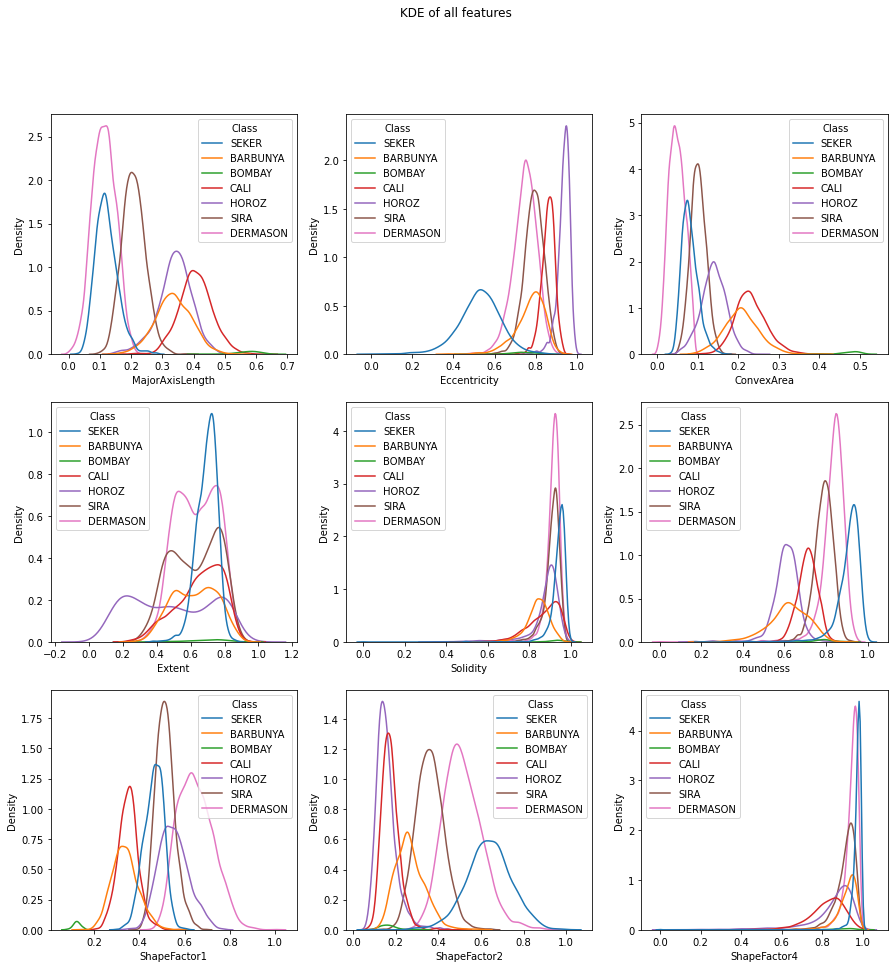

In [25]:
# Visulaize feature distributions per class

features_to_visulaize = X.iloc[:,:-1].columns.values.reshape(3,3)
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('KDE of all features')

for i in range(3):
    for j in range(3):
        sns.kdeplot(ax=axes[i, j], data=X, x=features_to_visulaize[i,j], hue='Class')
plt.show()

Some feature are able to strongly identify some classes

ShapeFactor 1 of Bombay type is always less than 0.004 anything else is higher

Eccentricity is able to distinguish beans of type SEKER and of type HOROZ

Also some types have flat curve for specific features which means that we could not use this feature to identify them like the feature Extent with type HOROZ

Training data is the initial dataset used to train machine learning algorithms. 

Models create and refine their rules using this data. 

It's a set of data samples used to fit the parameters of a machine learning model to training it by example. 

ML models look at their training dataset with past observations to make predictions. 

Training data is used in model training. 

Test data is used to evaluate the performance or accuracy of the model. 

It's a sample of data used to make an unbiased evaluation of the final model fit on the training data. 

The more we train the model, the more accurate it becomes. So it's always better to have a large amount of data as training data.

In [26]:
'''
Declare feature vector and target variable
'''

X = data.drop(['Class'], axis=1)
y = data['Class']


# split X and y into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.20, random_state = 42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.90, random_state = 42)

X_train1.shape, X_test1.shape
X_train1.dtypes



Area               float64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea         float64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
dtype: object

In [27]:
'''
Instantiate the LogisticRegression model 
'''

logreg = LogisticRegression()

'''
Fit the Model
'''

logreg.fit(X_train1, y_train1)


'''
Predict the Test set results with logistic regression classifier
'''
y_pred = logreg.predict(X_test1)


'''
Check accuracy score with logistic regression classifier
'''
print('Model accuracy score with logistic regression classifier index: {0:0.4f}'. format(logreg.score(X_test1, y_test1)))


'''
Compare the train-set and test-set accuracy
'''

y_pred_train = logreg.predict(X_train1)

y_pred_train

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train1, y_pred_train)))

'''
Check for overfitting and underfitting

'''

print('Training set score: {:.4f}'.format(logreg.score(X_train1, y_train1)))
print('Test set score: {:.4f}'.format(logreg.score(X_test1, y_test1)))

'''
Confusion Matrix
Classification Report
'''
cm = confusion_matrix(y_test1, y_pred)
print('Confusion matrix\n\n', cm)
print(classification_report(y_test1, y_pred))



C:\Users\Bablu\Documents\TFCert\venv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model accuracy score with logistic regression classifier index: 0.9225
Training-set accuracy score: 0.9168
Training set score: 0.9168
Test set score: 0.9225
Confusion matrix

 [[231   0  17   0   1   2  10]
 [  0 117   0   0   0   0   0]
 [  8   0 299   0   4   0   6]
 [  0   0   0 605   0  11  55]
 [  0   0   3   4 393   0   8]
 [  5   0   0  11   0 387  10]
 [  0   0   0  41   7   8 480]]
              precision    recall  f1-score   support

    BARBUNYA       0.95      0.89      0.91       261
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.94      0.94      0.94       317
    DERMASON       0.92      0.90      0.91       671
       HOROZ       0.97      0.96      0.97       408
       SEKER       0.95      0.94      0.94       413
        SIRA       0.84      0.90      0.87       536

    accuracy                           0.92      2723
   macro avg       0.94      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723



Check for overfitting and underfitting
We can see that the training-set score and test-set score is same as above. 

The training-set accuracy score is 0.9168 while the test-set accuracy to be 0.9225. 

These two values are quite comparable. So, there is no sign of overfitting/underfitting


In [28]:
# prepare the cross-validation procedure
cv = KFold(n_splits=100, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(logreg, X_train1, y_train1, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.915 (0.023)


In [29]:
X_train2.shape, X_test2.shape
X_train2.dtypes

Area               float64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea         float64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
dtype: object

In [30]:
'''
Instantiate the LogisticRegression model for 10-90 Train-Test Split
'''

logreg = LogisticRegression()

'''
Fit the Model
'''

logreg.fit(X_train2, y_train2)


'''
Predict the Test set results with logistic regression classifier
'''
y_pred = logreg.predict(X_test2)


'''
Check accuracy score with logistic regression classifier
'''
print('Model accuracy score with logistic regression classifier index: {0:0.4f}'. format(logreg.score(X_test2, y_test2)))


'''
Compare the train-set and test-set accuracy
'''

y_pred_train = logreg.predict(X_train2)

y_pred_train

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train2, y_pred_train)))

'''
Check for overfitting and underfitting

'''

print('Training set score: {:.4f}'.format(logreg.score(X_train2, y_train2)))
print('Test set score: {:.4f}'.format(logreg.score(X_test2, y_test2)))

'''
Confusion Matrix
Classification Report
'''
cm = confusion_matrix(y_test2, y_pred)
print('Confusion matrix\n\n', cm)
print(classification_report(y_test2, y_pred))


C:\Users\Bablu\Documents\TFCert\venv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model accuracy score with logistic regression classifier index: 0.9044
Training-set accuracy score: 0.9126
Training set score: 0.9126
Test set score: 0.9044
Confusion matrix

 [[ 973    0  113    0    9   22   83]
 [   2  466    0    0    0    0    0]
 [  21    0 1348    0   41    2   53]
 [   1    0    0 2966    4   58  156]
 [   1    0   26   21 1627    0   34]
 [  14    0    0   43    0 1698   78]
 [   2    0    2  296   56   33 2001]]
              precision    recall  f1-score   support

    BARBUNYA       0.96      0.81      0.88      1200
      BOMBAY       1.00      1.00      1.00       468
        CALI       0.91      0.92      0.91      1465
    DERMASON       0.89      0.93      0.91      3185
       HOROZ       0.94      0.95      0.94      1709
       SEKER       0.94      0.93      0.93      1833
        SIRA       0.83      0.84      0.83      2390

    accuracy                           0.90     12250
   macro avg       0.92      0.91      0.92     12250
weighted avg   

Check for overfitting and underfitting
We can see that the training-set score and test-set score is same as above. 

The training-set accuracy score is 0.9126 while the test-set accuracy to be 0.9044. 

These two values are quite comparable. So, there is no sign of overfitting/Underfitting

In [31]:
# prepare the cross-validation procedure
cv = KFold(n_splits=100, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(logreg, X_train2, y_train2, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.910 (0.080)


The k-fold cross-validation procedure is a standard method for estimating the performance of a machine learning algorithm on a dataset.



>1 mean=0.9150 se=0.002
>2 mean=0.9151 se=0.002
>3 mean=0.9153 se=0.002
>4 mean=0.9151 se=0.001
>5 mean=0.9152 se=0.001
>6 mean=0.9152 se=0.001
>7 mean=0.9151 se=0.001
>8 mean=0.9151 se=0.001
>9 mean=0.9151 se=0.001
>10 mean=0.9152 se=0.001
>11 mean=0.9151 se=0.001
>12 mean=0.9151 se=0.001
>13 mean=0.9151 se=0.001
>14 mean=0.9151 se=0.001
>15 mean=0.9151 se=0.001


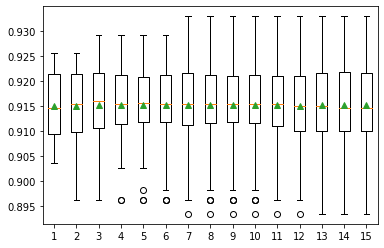

In [32]:
# compare the number of repeats for repeated k-fold cross-validation
from scipy.stats import sem
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
 
# evaluate a model with a given number of repeats
def evaluate_model(X, y, repeats):
    cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
    model = LogisticRegression()
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
 
repeats = range(1,16)
results = list()
for r in repeats:
    scores = evaluate_model(X_train1, y_train1, r)
    print('>%d mean=%.4f se=%.3f' % (r, mean(scores), sem(scores)))
    results.append(scores)

pyplot.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
pyplot.show()

Model accuracy score with criterion gini index: 0.7631
Training-set accuracy score: 0.7787
Training set score: 0.7787
Test set score: 0.7631


[Text(0.5, 0.875, 'X[2] <= 0.174\ngini = 0.826\nsamples = 10888\nvalue = [1061, 405, 1313, 2875, 1520, 1614, 2100]'),
 Text(0.25, 0.625, 'X[12] <= 0.527\ngini = 0.537\nsamples = 4622\nvalue = [4, 0, 1, 2747, 10, 1485, 375]'),
 Text(0.125, 0.375, 'X[14] <= 0.562\ngini = 0.241\nsamples = 1639\nvalue = [4, 0, 1, 91, 1, 1420, 122]'),
 Text(0.0625, 0.125, 'gini = 0.588\nsamples = 196\nvalue = [0, 0, 0, 57, 1, 30, 108]'),
 Text(0.1875, 0.125, 'gini = 0.071\nsamples = 1443\nvalue = [4, 0, 1, 34, 0, 1390, 14]'),
 Text(0.375, 0.375, 'X[1] <= 0.127\ngini = 0.2\nsamples = 2983\nvalue = [0, 0, 0, 2656, 9, 65, 253]'),
 Text(0.3125, 0.125, 'gini = 0.087\nsamples = 2382\nvalue = [0, 0, 0, 2275, 6, 61, 40]'),
 Text(0.4375, 0.125, 'gini = 0.472\nsamples = 601\nvalue = [0, 0, 0, 381, 3, 4, 213]'),
 Text(0.75, 0.625, 'X[14] <= 0.209\ngini = 0.789\nsamples = 6266\nvalue = [1057, 405, 1312, 128, 1510, 129, 1725]'),
 Text(0.625, 0.375, 'X[3] <= 0.275\ngini = 0.125\nsamples = 1439\nvalue = [5, 5, 79, 1, 1344

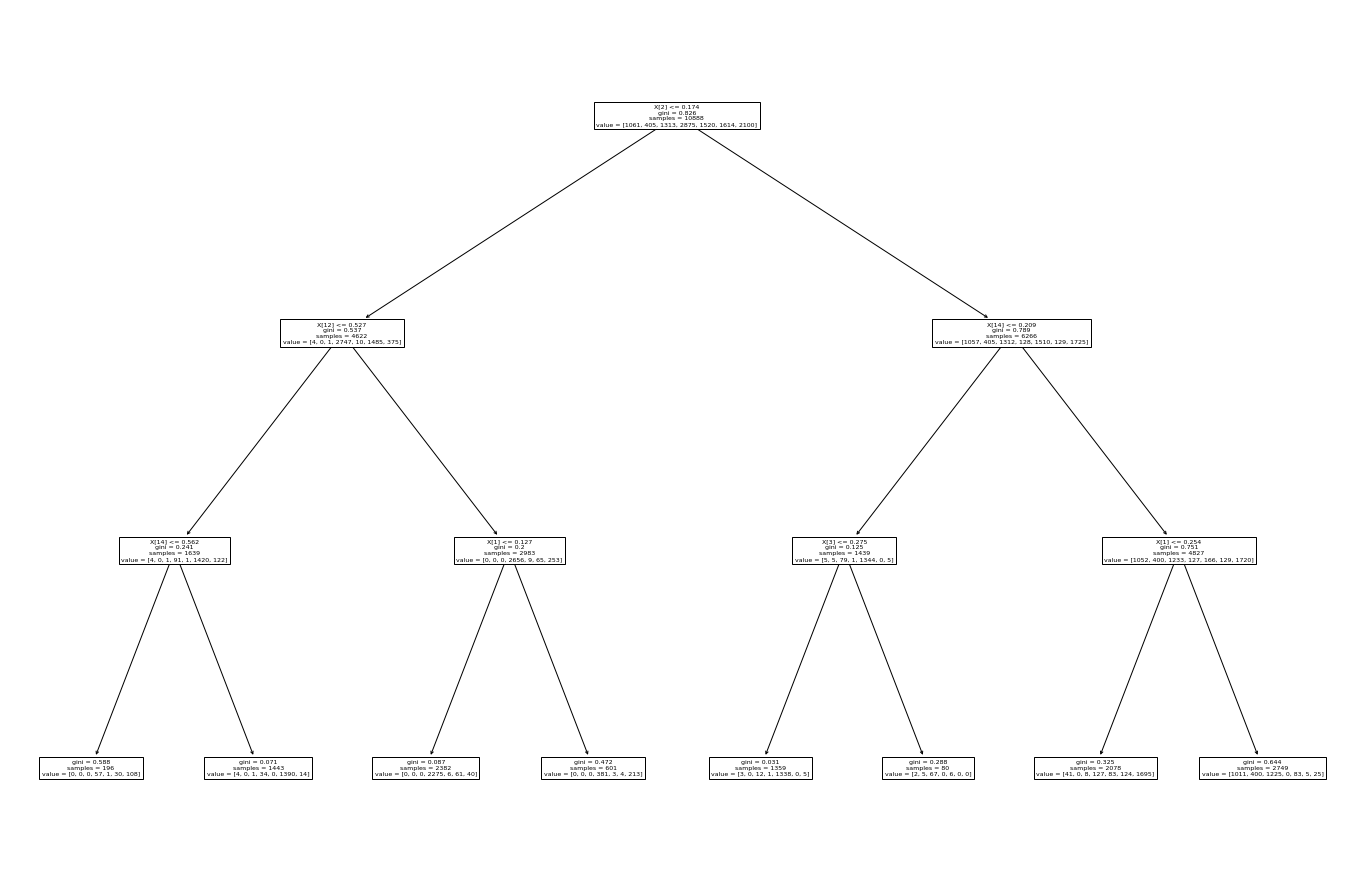

In [33]:

'''
Instantiate the DecisionTreeClassifier model with criterion gini index
'''

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
'''
fit the model
''' 
clf_gini.fit(X_train1, y_train1)
'''
Predict the Test set results with criterion gini index
'''
y_pred_gini = clf_gini.predict(X_test1)
'''
Check accuracy score with criterion gini index
'''

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test1, y_pred_gini)))
'''
Here, y_test are the true class labels and y_pred_gini are the predicted class labels in the test-set.

Compare the train-set and test-set accuracy to check for overfitting
'''

y_pred_train_gini = clf_gini.predict(X_train1)
y_pred_train_gini
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train1, y_pred_train_gini)))

'''
Check for overfitting and underfitting
'''

print('Training set score: {:.4f}'.format(clf_gini.score(X_train1, y_train1)))
print('Test set score: {:.4f}'.format(clf_gini.score(X_test1, y_test1)))
'''
Visualize decision-trees
'''

plt.figure(figsize=(24,16))
tree.plot_tree(clf_gini.fit(X_train1, y_train1)) 

The Logistic Regression model seems to be best fit model as compared to Decision Tree. 

The Scores are better for the Logistics Regression Model.

The Model is not underfitting 

The Model is not overfitting

The features selected are optimal to predict the class of the dry beans

The model is not complex 

The model is not very resource intensive

The model is not very large/heavy 

The model performance is good